# Task at hand

The data for this task comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily).
The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - We will use data from the Ann Arbor Michigan location
This data is stored in the file: "assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv"

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

As a task we need:
1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

Note: it is reasonable to remove leap days (i.e. February 29th) points from the dataset for the purpose of this visualization.

## Step 1
Load the dataset and transform the data into Celsius (refer to documentation) then extract all of the rows which have minimum or maximum temperatures.

In [1]:
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [2]:
# Converting Date to datetime object, converting Degrees Celcius
df["Date"] = pd.to_datetime(df["Date"])
df["Data_Value"] = df["Data_Value"] / 10

# creating dataframe with MAX temperature for each day from 2005 to 2015 for the graph
df_max_05_15 = df[df["Element"] == "TMAX"].sort_values("Date")

# creating dataframe with MIN temperature for each day from 2005 to 2015 for the graph
df_min_05_15 = df[df["Element"] == "TMIN"].sort_values("Date")

## Step 2
In order to visualize the data we would plot the min and max data for each day of the year between the years 2005 and 2014 across all weather stations. 

We also need to find out when the min or max temperature in 2015 falls below the min or rises above the max for the previous decade.

In [3]:
# Define the leap years within data
series_years = pd.to_datetime([str(i) for i in range(2005, 2016)])
leap_years = series_years[series_years.map(lambda x: True if x.is_leap_year else False)]

# deleting rows for 29 Feb for each leap year
for i in range(len(leap_years)):
    leap_index_1 = df_max_05_15.loc[(df_max_05_15['Date'] == str(leap_years[i].year) + "-02-29")].index
    # print(leap_index_1)
    df_max_05_15.drop(leap_index_1, axis=0, inplace=True)
    leap_index_2 = df_min_05_15.loc[(df_min_05_15['Date'] == str(leap_years[i].year) + "-02-29")].index
    df_min_05_15.drop(leap_index_2, axis=0, inplace=True)

# create a DataFrame of maximum temperature by date
max_value_05_15 = df_max_05_15.groupby("Date")["Data_Value"].max()

# create a DataFrame of minimum temperatures by date
min_value_05_15 = df_min_05_15.groupby("Date")["Data_Value"].min()

## Step 3
Now that we have grouped the daily max and min temperatures for each day of the years 2005 through 2015, we can separate out the data for 2015.

In [4]:
# calculate the minimum and maximum values for the day of the year for 2005 through 2014

# calculate the maximum values for the day of the year for 2005 through 2014
max_value_05_14 = max_value_05_15[max_value_05_15.index.year != 2015]
max_value_05_14 = max_value_05_14.groupby([max_value_05_14.index.month,
                                           max_value_05_14.index.day]).max()
max_value_05_14.index.names = ["Month", "Day"]
# calculate the minimum values for the day of the year for 2005 through 2014
min_value_05_14 = min_value_05_15[min_value_05_15.index.year != 2015]
min_value_05_14 = min_value_05_14.groupby([min_value_05_14.index.month,
                                           min_value_05_14.index.day]).min()
min_value_05_14.index.names = ["Month", "Day"]

# calculate the maximum values for the day of the year for 2015
max_value_15 = max_value_05_15[max_value_05_15.index.year == 2015]

# calculate the minimum values for the day of the year for 2015
min_value_15 = min_value_05_15[min_value_05_15.index.year == 2015]

## Step 4
Now we can visualize the result of our work.

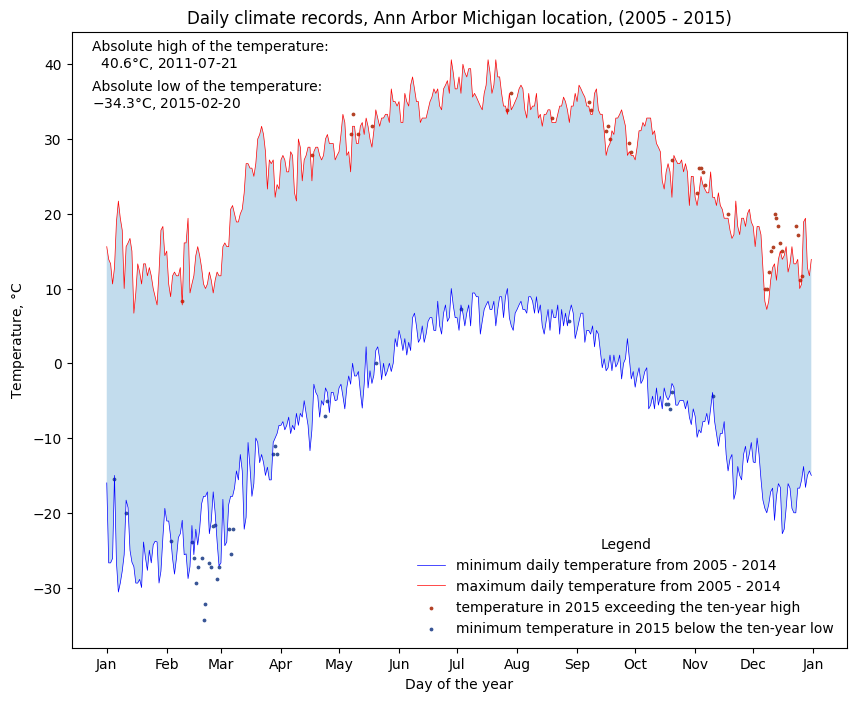

In [5]:
import matplotlib.pyplot as plt
from calendar import month_abbr
import matplotlib.dates as mdates

# put your plotting code here!
# Saving data index for x axis
x_axis_value = min_value_15.reset_index()["Date"]

# Defining points we want to scatter for 2015
max_15_plot = max_value_15.reset_index()["Data_Value"] > max_value_05_14.reset_index()["Data_Value"]
min_15_plot = min_value_15.reset_index()["Data_Value"] < min_value_05_14.reset_index()["Data_Value"]

max_15_plot_x = max_value_15.reset_index()[max_15_plot]["Date"]
max_15_plot_y = max_value_15.reset_index()[max_15_plot]["Data_Value"]

min_15_plot_x = min_value_15.reset_index()[min_15_plot]["Date"]
min_15_plot_y = min_value_15.reset_index()[min_15_plot]["Data_Value"]

# Preparing min_value_05_14 and max_value_05_14 for plotting
min_value_05_14 = min_value_05_14.reset_index()
min_value_05_14 = min_value_05_14["Data_Value"]

max_value_05_14 = max_value_05_14.reset_index()
max_value_05_14 = max_value_05_14["Data_Value"]

# Creating the figure
plt.figure(figsize=(10,8))

# Plot the min and max lines and fiiling the area between them
plt.plot(x_axis_value, min_value_05_14, '-b', linewidth=0.5,
         label= "minimum daily temperature from 2005 - 2014")
plt.plot(x_axis_value, max_value_05_14, '-r', linewidth=0.5,
         label= "maximum daily temperature from 2005 - 2014")
plt.fill_between(x_axis_value,
                 min_value_05_14, max_value_05_14,
                 facecolor="#86BADC",
                 alpha= 0.5)

# Plot scatter for the min and max extremes of 2015
plt.scatter(max_15_plot_x, max_15_plot_y, s=3, c="#B34226",
            label="temperature in 2015 exceeding the ten-year high")
plt.scatter(min_15_plot_x, min_15_plot_y, s=3, c="#395596",
            label="minimum temperature in 2015 below the ten-year low")

# Adding description
plt.xlabel("Day of the year")
plt.ylabel("Temperature, $\degree$C")
plt.title("Daily climate records, Ann Arbor Michigan location, (2005 - 2015)")

# Adding legend
plt.legend(loc=4, frameon=False, title='Legend')

# Adding additional information
plt.figtext(0.145, 0.835, "Absolute high of the temperature:\n  $40.6\degree$C, 2011-07-21")
plt.figtext(0.145, 0.785, "Absolute low of the temperature:\n$-34.3\degree$C, 2015-02-20")

# Ticks of the X axis xorrection to Month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

